# Проект статистического анализа

## Цель проекта:

    Выяснить какой тариф «Смарт» или «Ультра» приносит больше денег.
    На основании результатов анализа коммерческий департамент «Мегалайна» сможет скорректировать рекламный бюджет

## Входные данные:

    Данные 500 пользователей «Мегалайна» за 2018 год

## План проекта:

### Этап 1. Получение данных

    - импортируем библиотеки
    - откроем файлы с данными
    - изучим общую информацию данных

### Этап 2. Подготовка данных

    - найдем и исправим ошибки
    - приведем данные к нужным типам

    Посчитаем для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, 
      сообщений и  интернет-трафика; 
      остаток умножим на значение из тарифного плана; 
      прибавим абонентскую плату, соответствующую тарифному плану)

### Этап 3. Анализ данных

    Ответим на вопрос:
    - Сколько минут, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    Посчитаем среднее количество, дисперсию и стандартное отклонение
    Построим гистограммы
    Опишем распределения

### Этап 4. Проверка гипотез

    Гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Этап 5. Общие выводы

## Описание данных

#### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

#### Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Описание тарифов

### Тариф «Смарт»

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

## Этап 1. Получение данных

In [127]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [128]:
#загрузим данные
try: 
    users = pd.read_csv('/datasets/users.csv') #путь к файлу в общем хранилище
except: 
    users = pd.read_csv('C:/Users/Admin/Downloads/users.csv') #путь к файлу на локальной машине

In [129]:
try: 
    calls = pd.read_csv('/datasets/calls.csv')
except: 
    calls = pd.read_csv('C:/Users/Admin/Downloads/calls.csv') 

In [130]:
try: 
    messages = pd.read_csv('/datasets/messages.csv') 
except: 
    messages = pd.read_csv('C:/Users/Admin/Downloads/messages.csv')

In [132]:
try: 
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
except:
    internet = pd.read_csv('C:/Users/Admin/Downloads/internet.csv', index_col=0)

In [133]:
try: 
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    tariffs = pd.read_csv('C:/Users/Admin/Downloads/tariffs.csv')

In [134]:
df = [users, calls, messages, internet, tariffs]
for row in df:
    print('Первые пять строк фрейма данных')
    print(row.head())
    print('Общая информация')
    print(row.info())
    print('Дубликатов в таблице:', row.duplicated().sum())
    print('Пропусков в таблице:')
    print(row.isna().sum())
    print('====================================')
    print('====================================')

Первые пять строк фрейма данных
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    objec

Проверим количество уникальных юзеров (пользователей). Во входных данных указано количество = 500.

In [135]:
users.nunique()

user_id       500
age            58
churn_date     33
city           76
first_name    246
last_name     419
reg_date      270
tariff          2
dtype: int64

Заявленное количество пользователей подтвердилось

#### Выводы после предварительного просмотра:

- В датасете users в столбце 'churn_date' есть пропуски, но данные пропуски необходимы для анализы, они означают, что тариф ещё действовал на момент выгрузки данных
- Во всех датасетах (кроме тарифов) поменяем тип данных в столбце с датой 
- В датасетах поменяем тип данных в столбце 'id'
- В таблице 'звонки' округлить секунды до минут

## Этап 2. Подготовка данных

In [136]:
#поменяем тип данных в столбцах с датами в датасетах
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
#поменяем тип данных в столбцах 'id'
calls['id'] = calls['id'].astype('int')
messages['id'] = messages['id'].astype('int')
internet['id'] = internet['id'].astype('int')

In [137]:
#проверим изменения типов данных
users.info()
print('______________________________')
calls.info()
print('______________________________')
messages.info()
print('______________________________')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration

In [138]:
#округлим неполные минуты до целых значений 
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


### Посчитаем для каждого пользователя:

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [139]:
#добавим столбец с месяцами в данные о звонках
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12


In [140]:
#создадим переменную, а в ней сохраним группировку по месяцам количества и сумм звонков
calls_quantity = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'sum','id':'count'})
calls_quantity.head()

,user_id,month,sum,count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


#### Количество отправленных сообщений по месяцам

In [141]:
#добавим столбец с месяцами в данные о сообщениях
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


In [142]:
#создадим переменную, сохраним в ней группировку по месяцам количество сообщений
messages_quantity = messages.groupby(['user_id', 'month'])\
                  .agg({'id':'count'})\
                  .reset_index()\
                  .rename(columns={'id':'count'})
messages_quantity.head()

,user_id,month,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Объем израсходованного интернет-трафика по месяцам

In [143]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,11
1,10001,1052.81,2018-09-07,1000,9
2,10002,1197.26,2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


In [144]:
#создадим переменную, сохраним в ней группировку по месяцам интернет-трафик
internet_quantity = internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used':'sum'})\
                  .reset_index()\
                  .rename(columns={'mb_used':'sum'})
internet_quantity['sum'] = internet_quantity['sum']/1024   #переведем мегабайты в гигабайты
internet_quantity['sum'] = internet_quantity['sum'].apply(np.ceil).astype('int') #округлим до ближайшего числа в большую сторону
internet_quantity.head()

,user_id,month,sum
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


In [145]:
#в таблице тарифов переведем мегабайты в гигабайты
#м переименуем столбец 'tariff_name' в 'tariff' для дальнейшего присоединения данных
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


#### Присоединим наши таблицы, группированные по месяцам в одну

In [146]:
#сначала присоединим сообщения к звонкам 
data = calls_quantity\
       .merge(messages_quantity, on=['user_id','month'], how='outer')\
       .rename(columns={'sum':'calls_sum','count_x':'calls_count','count_y':'messages_count'})
data.head()

,user_id,month,calls_sum,calls_count,messages_count
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0


In [147]:
#и добавим столбец с интернетом
data = data\
       .merge(internet_quantity, on=['user_id','month'], how='outer')\
       .rename(columns={'sum':'internet_sum'})
data.head()

,user_id,month,calls_sum,calls_count,messages_count,internet_sum
0,1000,5,159.0,22.0,22.0,3.0
1,1000,6,172.0,43.0,60.0,23.0
2,1000,7,340.0,47.0,75.0,14.0
3,1000,8,408.0,52.0,81.0,14.0
4,1000,9,466.0,58.0,57.0,15.0


Добавим к общей таблице датасет с данными пользователей

In [148]:
data = data\
       .merge(users[['user_id', 'city', 'tariff', 'churn_date']] , on=['user_id'], how='outer')
data.head()

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra,NaT
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra,NaT
2,1000,7.0,340.0,47.0,75.0,14.0,Краснодар,ultra,NaT
3,1000,8.0,408.0,52.0,81.0,14.0,Краснодар,ultra,NaT
4,1000,9.0,466.0,58.0,57.0,15.0,Краснодар,ultra,NaT


Также добавим к общим данным таблицу с тарифами

In [149]:
data = data\
       .merge(tariffs, on=['tariff'], how='outer')
data.head()

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,75.0,14.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,81.0,14.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,57.0,15.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1


Общая таблица готова, с данными использованных ресурсам по каждому пользователю по месяцам и данными по тарифам

In [150]:
data.nunique() #посмотрим на количество уникальных юзеров после склейки

user_id                  500
month                     12
calls_sum                925
calls_count              183
messages_count           179
internet_sum              48
city                      76
tariff                     2
churn_date                33
messages_included          2
mb_per_month_included      2
minutes_included           2
rub_monthly_fee            2
rub_per_gb                 2
rub_per_message            2
rub_per_minute             2
dtype: int64

In [151]:
#проверим наличие пропусков
data.isna().sum()

user_id                     0
month                       2
calls_sum                  42
calls_count                42
messages_count            499
internet_sum               13
city                        0
tariff                      0
churn_date               3027
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Наличие пропусков означает, что клиент не пользовался услугами. Необходимо заменить пропуски на нули, кроме столбца 'churn_date'
Также появились 2 пропущенных значения в столбце месяцев, придется удалить их

In [152]:
data['calls_sum'] = data['calls_sum'].fillna(0)
data['calls_count'] = data['calls_count'].fillna(0)
data['messages_count'] = data['messages_count'].fillna(0)
data['internet_sum'] = data['internet_sum'].fillna(0)
data = data.dropna(subset=['month']) 

In [153]:
data.isna().sum() #перепроверим

user_id                     0
month                       0
calls_sum                   0
calls_count                 0
messages_count              0
internet_sum                0
city                        0
tariff                      0
churn_date               3027
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [154]:
data.duplicated().sum() #проверим наличие дубликатов

0

#### Посчитаем для каждого пользователя помесячную выручку с каждого пользователя.
Для этого вычтим бесплатный лимит из суммарного количества звонков, сообщений и  интернет-трафика; остаток умножим на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану.

In [184]:
#напишем функцию для подсчета общей выручки
def revenue_tariff(row):
    messages = (row['messages_count'] - row['messages_included'])* row['rub_per_message']
    calls = (row['calls_sum'] - row['minutes_included']) * row['rub_per_minute']
    internet = np.floor((row['internet_sum'] - row['mb_per_month_included']) * row['rub_per_gb'])
    total = 0
    for index in [messages, calls, internet]:
        if index > 0:
            total += index
    return total

In [185]:
data['revenue_tariff'] = data.apply(lambda x: revenue_tariff(x), axis=1)

In [186]:
data['revenue'] = data['rub_monthly_fee'] + data['revenue_tariff']
del data['revenue_tariff']
data.head()

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_difference
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
2,1000,7.0,340.0,47.0,75.0,14.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
3,1000,8.0,408.0,52.0,81.0,14.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
4,1000,9.0,466.0,58.0,57.0,15.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0


Полный расчет выручки по каждому пользователю произвели

## Этап 3. Анализ данных

    Ответим на вопрос:
    - Сколько минут, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
    Для этого:
    Посчитаем среднее количество, дисперсию и стандартное отклонение
    Построим гистограммы
    Опишем распределения

In [187]:
#Сформируем сводную таблицу и расчитаем среднее значение, дисперсию и стандарт. отклонение по всем значениям
data.pivot_table(
    index = 'tariff',
    values = ['calls_sum', 'messages_count', 'internet_sum', 'revenue'],
    aggfunc= ['mean', 'var','std'])

mean                                                     var  \
         calls_sum internet_sum messages_count      revenue      calls_sum   
tariff                                                                       
smart   417.934948    16.328847      33.384029  1289.973531   36219.315784   
ultra   526.623350    19.494416      49.363452  2070.152284  100873.633397   

                                                          std               \
       internet_sum messages_count        revenue   calls_sum internet_sum   
tariff                                                                       
smart     33.028705     796.812958  669785.708006  190.313730     5.747061   
ultra     97.091686    2285.266143  141516.745079  317.606098     9.853511   

                                   
       messages_count     revenue  
tariff                             
smart       28.227876  818.404367  
ultra       47.804457  376.187114

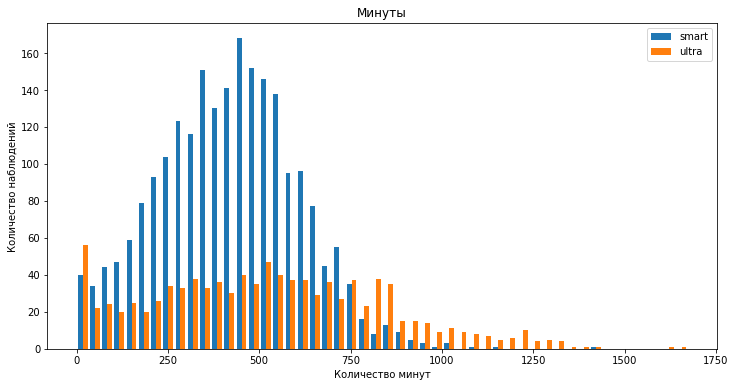

In [188]:
#построим общий график и сравним динамику по минутам по двум тарифам
a = data[data['tariff'] == 'smart']['calls_sum']
b = data[data['tariff'] == 'ultra']['calls_sum']
plt.figure(figsize=(12,6))
bins = 50
plt.hist([a, b], bins, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.title('Минуты')
plt.xlabel("Количество минут")
plt.ylabel("Количество наблюдений")
plt.show()

Распределение выборки по тарифу смарт близко к нормальному, по ультра - скошено влево.
Среднее значение звонков в месяц пользователей тарифом смарт = 417, что вплотную приближается к лимиту в 500. Клиенты используют максимум бесплатных звонков по тарифу.
Среднее значение звонков по ультра = 526, у пользователей ещё остается запас в 2500 бесплатных минут по тарифу. 

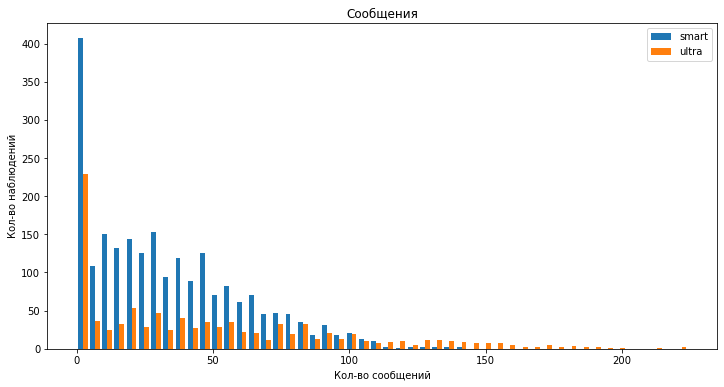

In [189]:
#построим общий график и сравним динамику по минутам по двум тарифам
a = data[data['tariff'] == 'smart']['messages_count']
b = data[data['tariff'] == 'ultra']['messages_count']
plt.figure(figsize=(12,6))
bins = 50
plt.hist([a, b], bins, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.title('Сообщения')
plt.xlabel("Кол-во сообщений")
plt.ylabel("Кол-во наблюдений")
plt.show()

Распределения значений по тарифам похожи между собой, скошены влево оба графика.
Среднее значение по смарту в месяц = 33, лимит = 50;
Среднее значение по ультра = 49, лимит = 1000.
Пользователи тарифом смарт, в среднем, вписываются в свой лимит, пользователи ультра тоже, даже с лихвой, что говорит о низким интересом к данной услуге

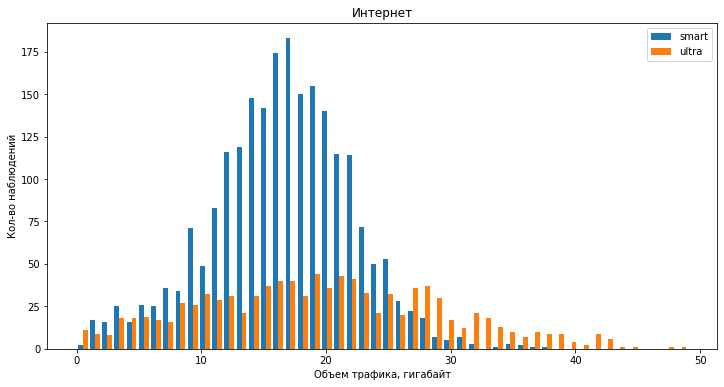

In [190]:
#построим общий график и сравним динамику по минутам по двум тарифам
a = data[data['tariff'] == 'smart']['internet_sum']
b = data[data['tariff'] == 'ultra']['internet_sum']
plt.figure(figsize=(12,6))
bins = 50
plt.hist([a, b], bins, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.title('Интернет')
plt.xlabel("Объем трафика, гигабайт")
plt.ylabel("Кол-во наблюдений")
plt.show()

Распределения обоих графиков нормальные.
Среднее значение Смарта по интернету = 16 гигабайт в месяц, при лимите в 15.
Ультра = 19 гигабайт в месяц, при лимите в 30.
Это значит, что пользователям тарифа смарт интернет-трафика в рамках лимита на месяц не хватает, в отличии от пользователей ультра.

#### Ответим на вопрос: какой тариф приносит больше прибыли?

In [191]:
#посмотрим ещё раз на среднее значение, стандартное отклонение и дисперсию выручки по тарифам
data.pivot_table(
    index = 'tariff',
    values = ['revenue'],
    aggfunc= ['mean', 'var','std'])

,mean,var,std
,revenue,revenue,revenue
tariff,,,
smart,1289.973531,669785.708006,818.404367
ultra,2070.152284,141516.745079,376.187114


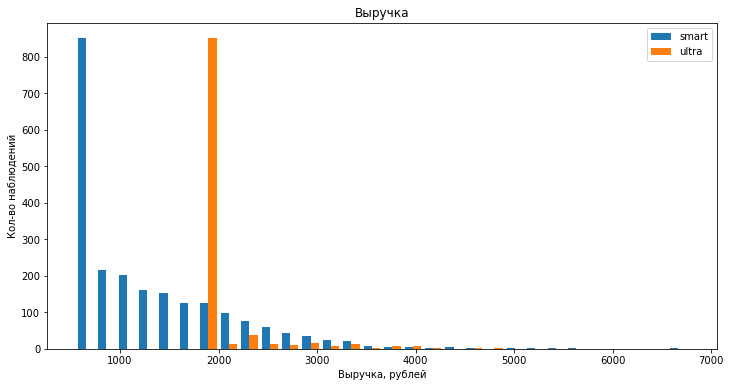

In [192]:
#построим общий график и сравним динамику по выручке по двум тарифам
                 
a = data[data['tariff'] == 'smart']['revenue']
b = data[data['tariff'] == 'ultra']['revenue']

plt.figure(figsize=(12,6))
bins = 30
plt.hist([a, b], bins, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.title('Выручка')
plt.xlabel("Выручка, рублей")
plt.ylabel("Кол-во наблюдений")
plt.show()

In [193]:
#добавим столбец с разницей выручки сверз тарифа от общей выручки
data['revenue_difference'] = data['revenue'] - data['rub_monthly_fee']
data['revenue_difference'].where(~(data.revenue_difference < 0), other=0, inplace=True)

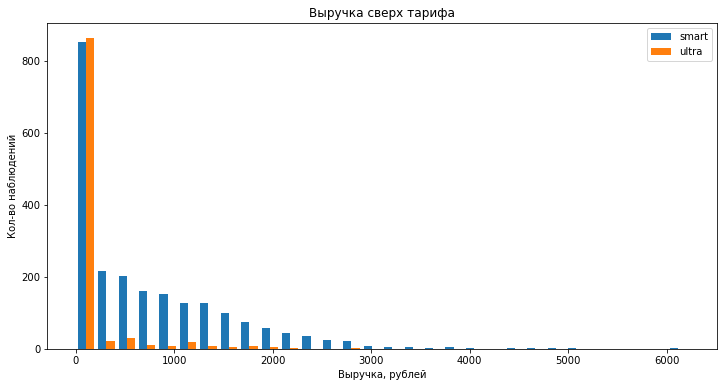

In [194]:
#построим общий график и сравним динамику по выручке сверх тарифа
                 
a = data[data['tariff'] == 'smart']['revenue_difference']
b = data[data['tariff'] == 'ultra']['revenue_difference']

plt.figure(figsize=(12,6))
bins = 30
plt.hist([a, b], bins, label=['smart', 'ultra'])
plt.legend(loc='upper right')
plt.title('Выручка сверх тарифа')
plt.xlabel("Выручка, рублей")
plt.ylabel("Кол-во наблюдений")
plt.show()

In [195]:
#посчитаем общую сумму выручки и сумму выручки сверх тарифа
data.groupby('tariff')\
  .agg({'revenue':['sum'], 'revenue_difference':['sum']})\
  .style.format("{:.2f}")

,revenue,revenue_difference
,sum,sum
tariff,,
smart,2875351.00,1649401.00
ultra,2039100.00,118350.00


Получается, что бОльшую прибыль приносят пользователи тарифа Смарт. Как по общему объему, так и по сумме выручки сверх тарифа.

#Выводы:
1. Количество звонков у пользователей обоих тарифов практически одинаково, около 500 в месяц. Но те у кого смарт, полностью исчерпывают свой лимит, тогда как с ультрой пользователи используют лишь 1/6 часть своего лимита по звонкам
2. По количеству отправки сообщений у пользователей также в рамках своих лимитов. Популярность смс очень невысока.
3. С интернетом ситуация другая: пользователи смарта "вываливаются" из своего лимита, им приходится докупать трафик. У пользователей ультра трафик в рамках лимита.
4. Наибольшую прибыль приносят пользователи тарифа Смарт, чем пользователи тарифа Ультра:
- По общему объему выручки = в 1.4 раза больше
- По объему выручки сверх тарифа = в 14 раз больше

## Этап 4. Проверка гипотез

    Гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

#### 4.1 Различие выручки пользователей разных тарифов

Сформулируем основную и альтернативную гипотезы:
* H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
* H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [196]:
#создадим две переменные и сохраним в них срезы по тарифам

In [197]:
data_smart = data.query('tariff == "smart"')
data_smart.head(2)

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_difference
986,1001,11.0,430.0,59.0,0.0,18.0,Москва,smart,NaT,50,15.0,500,550,200,3,3,1150.0,600.0
987,1001,12.0,414.0,63.0,0.0,14.0,Москва,smart,NaT,50,15.0,500,550,200,3,3,550.0,0.0


In [198]:
data_ultra = data.query('tariff == "ultra"')
data_ultra.head(2)

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_difference
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0


In [199]:
#специальным методом проверим гипотезу о равенстве среднего двух генеральных совокупностей
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    data_smart['revenue'], 
    data_ultra['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Разница между средней выручкой двух генеральных совокупностей не случайна.

In [200]:
print('Средняя выручка пользователей Смарт', data_smart['revenue'].mean())
print('Средняя выручка пользователей Ультра', data_ultra['revenue'].mean())

Средняя выручка пользователей Смарт 1289.9735307312696
Средняя выручка пользователей Ультра 2070.1522842639592


Средние значения и правда значительно отличаются между собой.

#### 4.2 Различие выручки пользователей из Москвы и других городов

Сформулируем основную и альтернативную гипотезы:
* H₀ - средняя выручка пользователей из Москвы и других регионов равна
* H₁ - средняя выручка пользователей из Москвы и других регионов не равна

In [201]:
#создадим две переменные и сохраним в них срезы по регионам
data_msk = data.query('city == "Москва"')
data_msk.head(2)

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_difference
8,1003,8.0,380.0,55.0,37.0,9.0,Москва,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
9,1003,9.0,961.0,134.0,91.0,13.0,Москва,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0


In [202]:
data_no_msk = data.query('city != "Москва"')
data_no_msk.head(2)

,user_id,month,calls_sum,calls_count,messages_count,internet_sum,city,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_difference
0,1000,5.0,159.0,22.0,22.0,3.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0
1,1000,6.0,172.0,43.0,60.0,23.0,Краснодар,ultra,NaT,1000,30.0,3000,1950,150,1,1,1950.0,0.0


In [203]:
#проверим гипотезу о равенстве среднего двух генеральных совокупностей
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    data_msk['revenue'], 
    data_no_msk['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Вероятность получить равнозначность средних значений в двух выборках = 54%
Нулевая гипотеза близка к правде.

In [204]:
#проверим простым методом.
print('Средняя выручка пользователей из Москвы', data_msk['revenue'].mean())
print('Средняя выручка пользователей из регионов', data_no_msk['revenue'].mean())

Средняя выручка пользователей из Москвы 1546.7135842880523
Средняя выручка пользователей из регионов 1524.9362274298885


Действительно средние значения выручки пользователей из Москвы и регионов практически равны

Гипотезы:
* Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергаем
* Средняя выручка пользователей из Москвы и из других регионов равна - отвергнуть не удалось

## Этап 5. Общие выводы

Количество звонков и смс-сообщений у пользователей обоих тарифов почти одинаково. При том, что тариф Ультра обеспечивает пользователям ощутимый запас по данным услугам (в отличии от тарифа Смарт), пользователи всё равно не испозуют его полностью.
С интернет-трафиком ситуация другая, он нужен и тем и другим. С тарифом Смарт пользователи превышают лимит за доп. плату., с Ультра - используют услугу в полном объеме.

Наибольшую прибыль приносят пользователи тарифа Смарт, чем пользователи тарифа Ультра

Тариф Смарт:
- Общая выручка = 2875351 рубль
- Выручка сверх тарифа = 1649401 рубль

Тариф Ультра:
- Общая выручка = 2039100 рубль
- Выручка сверх тарифа = 118350 рубль

#### Гипотезы:
- Тарифы приносят разные деньги. Средняя выручка у тарифов отличается.
- В Москве и в других регионах люди платят за связь практически одинаково. Разницы средней выручки между регионами почти нет.

Средняя выручка по тарифам
* Средняя выручка пользователей Смарт: 1289 рублей
* Средняя выручка пользователей Ультра: 2070 рублей

Средняя выручка по регионам
* Средняя выручка пользователей из Москвы: 1546 рублей
* Средняя выручка пользователей из регионов: 1524 рублей

#### Рекомендации коммерческому департаменту:

1. Пересмотреть предлагаемое количество смс в рамках тарифа Ультра, возможно стоит снизить его, предложив клиентам взамен что-то альтернативное. Не используется огромный ресурс.
2. Сравнить прибыль от переплат по тарифу Смарт и потери из-за оттока пользователей. Возможно переплата за интернет разочаровывает людей, а платить за Ультра они не хотят. Возможна вероятность убытков из-за оттока клиентов.

#### Рекомендации разработчикам:

Округлять мегабайты и секунды до гигабайт и минут автоматически.